In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util, plots
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

Text(0.5, 0, 'Adjusted Rand Index')

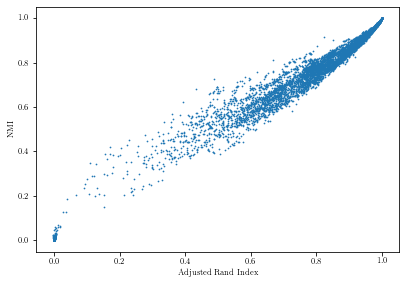

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

ax.scatter(summary['rand'], summary['nmi'], marker='.', s=2)
ax.set_ylabel('NMI')
ax.set_xlabel('Adjusted Rand Index')

In [22]:
f = summary[(summary['iterations'] < 1000) & (summary['method'] != 'mfm_sm') & (summary['method'] != 'dpm_sm')]

f[['method', 'iterations', 'file', 'num_clusters']]

,method,iterations,file,num_clusters
2509,dpm_eb_gibbs,87,"./phase_1/eval/dpm_eb_gibbs/d=8,p=1920,k=3,r=0...",76
2546,dpm_eb_gibbs,157,"./phase_1/eval/dpm_eb_gibbs/d=8,p=1920,k=3,r=0...",32
2566,dpm_eb_gibbs,70,"./phase_1/eval/dpm_eb_gibbs/d=8,p=1920,k=3,r=0...",66
2699,dpm_eb_gibbs,42,"./phase_1/eval/dpm_eb_gibbs/d=3,p=720,k=3,r=0....",98
2770,dpm_eb_gibbs,100,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1200,k=5,r=0...",98
2914,dpm_eb_gibbs,31,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1920,k=8,r=0...",100
2935,dpm_eb_gibbs,28,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1920,k=8,r=0...",83
2944,dpm_eb_gibbs,22,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1920,k=8,r=0...",88
2952,dpm_eb_gibbs,38,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1920,k=8,r=0...",84
2967,dpm_eb_gibbs,37,"./phase_1/eval/dpm_eb_gibbs/d=3,p=1920,k=8,r=0...",82


In [75]:
methods

['mfm_sm', 'dpm_sm', 'dpm_eb_gibbs', 'dpm_big_alpha', 'dpm_eb']

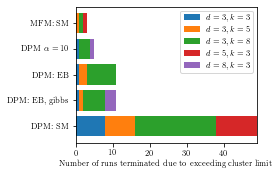

In [117]:
METHODS = {
    'dpm_sm': "DPM: SM",
    'dpm_eb_gibbs': "DPM: EB, gibbs",
    'dpm_eb': "DPM: EB",
    'dpm_big_alpha': r"DPM $\alpha=10$",
    'mfm_sm': "MFM: SM",
}


fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))
df = summary[summary['iterations'] < 1000]
methods = list(df['method'].drop_duplicates())

bottom = np.zeros(len(METHODS))

for t in defs.TESTS_P1:
    df_f = util.filter(df, **t)
    
    next_d = [len(df_f[df_f['method'] == m]) for m in METHODS]
    ax.barh(np.arange(len(METHODS)), next_d, left=bottom, label="$d={}, k={}$".format(t['d'], t['k']))
    bottom += np.array(next_d)

ax.set_yticks(np.arange(len(methods)))
ax.set_yticklabels([v for k, v in METHODS.items()])
ax.legend()
ax.set_xlabel('Number of runs terminated due to exceeding cluster limit')

plt.savefig('./plots/failures_bar.pdf', bbox_inches='tight')
